In [1]:
%matplotlib notebook

/Users/VyUng/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

In [241]:
import datetime

In [213]:
import matplotlib.pyplot as plt

In [206]:
from sklearn.linear_model import LinearRegression

In [330]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [328]:
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

In [299]:
from sklearn.linear_model import LogisticRegression

In [374]:
import numpy as np
#import matplotlib.pyplot as plt
from sklearn import linear_model
import matplotlib.pyplot as plt
years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' 
         % y for y in years]
#I imported the data, using the three variables: 
#LST_DATE,LST_TIME and AIR_TEMPERATURE 
#(which corresponds to columns with indexes 3, 4 and 8. 
#I chose to use local standard time so that I can get better intuition 
#from the data. 
usecols = [3, 4, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

print data

[[  2.01012310e+07   1.60500000e+03  -6.40000000e+00]
 [  2.01012310e+07   1.61000000e+03  -6.50000000e+00]
 [  2.01012310e+07   1.61500000e+03  -6.50000000e+00]
 ..., 
 [  2.01612310e+07   1.55000000e+03   0.00000000e+00]
 [  2.01612310e+07   1.55500000e+03  -1.00000000e-01]
 [  2.01612310e+07   1.60000000e+03  -1.00000000e-01]]


In [375]:
#Here I converted time column into the form of "minutes of the day"
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)

In [376]:
#Here I converted day column into the form of "days of the year" 
days=[]
for d in data[:, 0]:
    days.append(datetime.datetime.strptime(str(d),'%Y%m%d.0').timetuple().tm_yday)
for i in range(len(days)):
    data[i,0]=days[i]

In [377]:
#Define valid, so that we can leave out invalid rows
valid = data[:, 2] > -1000

In [378]:
#x1 is the date variable
x1=data[valid,0].reshape(630854,1)
#Splitting x1 into two sets: train set (first 5 year) 
#and test set (last 1 year)
x1_train=x1[0:525887]
x1_test=x1[525887:630855]
#x2 is the time variable
x2=data[valid,1].reshape(630854,1)
#Splitting x2 into two sets: train set (first 5 year) 
#and test set (last 1 year)
x2_train=x2[0:525887]
x2_test=x2[525887:630855]
#Combine x1 and x2 to get the valid x:
x= np.concatenate((x1,x2),axis=1)

In [379]:
#Get the valid y:
y=data[valid,2].reshape(630854,1)

x_train=x[0:525887,0:2]
x_test=x[525887:630855,0:2]
y_train=y[0:525887]
y_test=y[525887:630855]

In [380]:
#Choosing the centers for x1:
c1=np.array(np.linspace(0,365,30))
c1=c1.reshape(30,1)
#Choosing the centers for x2:
c2=np.array(np.linspace(0,1435,35))
c2=c2.reshape(35,1)
#Choosing sigma for x1
s1=750
#Choosing sigma for x2
s2=8000
#Radial_basis_function: 
def radial_basis_function(data,centers,sigma):
    gamma=1.0/float(sigma)
    result=rbf_kernel(data,centers,gamma)
    return result
r1=radial_basis_function(x1,c1,s1)
r2=radial_basis_function(x2,c2,s2)

In [381]:
print r1.shape

(630854, 30)


In [382]:
print r2.shape

(630854, 35)


In [383]:
r=np.concatenate((r1,r2),axis=1)

In [384]:
r_train=r[0:525887]
r_test=r[525887:630855]

In [385]:
#Perform linear regression: 
regr = LinearRegression()
regr.fit(r_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [386]:
y_pred=regr.predict(r_test)
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" 
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' 
      % r2_score(y_test, y_pred))

('Coefficients: \n', array([[  8.75584233e+02,  -1.54158723e+03,   2.61675670e+03,
         -3.17454344e+03,   3.99945345e+03,  -4.25400066e+03,
          4.72111481e+03,  -4.56039912e+03,   4.61488435e+03,
         -4.11207644e+03,   3.89128528e+03,  -3.11027529e+03,
          2.60506321e+03,  -1.58945651e+03,   9.55172030e+02,
          9.52788322e+01,  -6.70218164e+02,   1.58797496e+03,
         -1.98366699e+03,   2.70144552e+03,  -2.88014123e+03,
          3.34856881e+03,  -3.22975161e+03,   3.35806645e+03,
         -2.91930557e+03,   2.78695040e+03,  -2.17354348e+03,
          1.91015046e+03,  -1.16033330e+03,   7.50941426e+02,
          2.08298301e+00,  -3.25081231e+00,   4.59625697e+00,
         -4.17137257e+00,   3.51784642e+00,  -1.50600588e+00,
         -2.36089726e-01,   2.45089913e+00,  -3.81472450e+00,
          4.87625628e+00,  -4.98308055e+00,   5.97968975e+00,
         -5.00026274e+00,   7.09048452e+00,  -5.70774428e+00,
          8.25799044e+00,  -5.76409874e+00,   7.7

In [387]:
#Doing regression using each variable separately: 

In [388]:
#Time-of-year contribution
r1_train=r1[0:525887]

#Time-of-day contribution
r2_train=r2[0:525887]

In [390]:
r1_test=r1[525887:630855]
r2_test=r2[525887:630855]
print r1_test.shape
print r2_test.shape

(104967, 30)
(104967, 35)


In [391]:
regr1 = LinearRegression()
regr1.fit(r1_train, y_train)
regr2 = LinearRegression()
regr2.fit(r2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [414]:
y_pred1=regr1.predict(r1_test)
print('Coefficients for yearly component: \n', regr1.coef_)
# The mean squared error
print("Mean squared error for yearly component : %.2f" 
      % mean_squared_error(y_test, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score for yearly component: %.2f' 
      % r2_score(y_test, y_pred1))

('Coefficients for yearly component: \n', array([[  880.20858675, -1548.67025345,  2628.15265902, -3186.91998285,
         4014.58120579, -4268.85298874,  4737.81653381, -4576.22069445,
         4632.16832645, -4128.22275161,  3908.66836562, -3126.22433974,
         2621.80072698, -1604.11784196,   969.79367258,    83.63404356,
         -659.33538301,  1580.36074511, -1976.71984722,  2697.60813271,
        -2876.99687055,  3348.72575371, -3230.68464763,  3361.95689887,
        -2923.20630489,  2792.88551062, -2178.57202388,  1916.25872097,
        -1164.33912613,   754.46528525]]))
Mean squared error for yearly component : 26.54
Variance score for yearly component: 0.56


In [393]:
y_pred2=regr2.predict(r2_test)
print('Coefficients for daily component: \n', regr2.coef_)
# The mean squared error
print("Mean squared error for daily component : %.2f" 
      % mean_squared_error(y_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score for daily component: %.2f' 
      % r2_score(y_test, y_pred2))

('Coefficients for daily component: \n', array([[ 2.43279844, -3.8896477 ,  5.69793979, -5.53891658,  5.22840765,
        -3.29210423,  1.67080797,  0.6930958 , -2.14150823,  3.52846415,
        -3.87412208,  5.34356646, -4.75383419,  7.45174778, -6.50985005,
         9.56507973, -7.29406239,  9.5081184 , -5.90235714,  7.73356689,
        -3.82710713,  5.53982254, -2.21055452,  4.23344559, -1.79979735,
         2.29523986,  0.33399363, -1.240143  ,  2.85472746, -2.99385814,
         4.16040878, -3.66402257,  4.1661087 , -2.68309926,  1.8662189 ]]))
Mean squared error for daily component : 57.47
Variance score for daily component: 0.04


In [398]:
#Create two plots, one showing the time-of-day contribution, 
#and one showing the time-of-year contribution 
#Generating space of x's for prediction
plot_x1=np.linspace(0,365,100)
plot_x1=plot_x1.reshape(100,1)
plot_x2=np.linspace(0,1435,100)
plot_x2=plot_x2.reshape(100,1)
plot_r1=radial_basis_function(plot_x1,c1,s1)
plot_r2=radial_basis_function(plot_x2,c2,s2)

#Predict with variable day
plot_y_pred1=regr1.predict(plot_r1)
#Predict with variable time
plot_y_pred2=regr2.predict(plot_r2)



In [412]:
print x1_test.shape
print x2_test.shape
print y_pred.shape

(104967, 1)
(104967, 1)
(104967, 1)


<IPython.core.display.Javascript object>


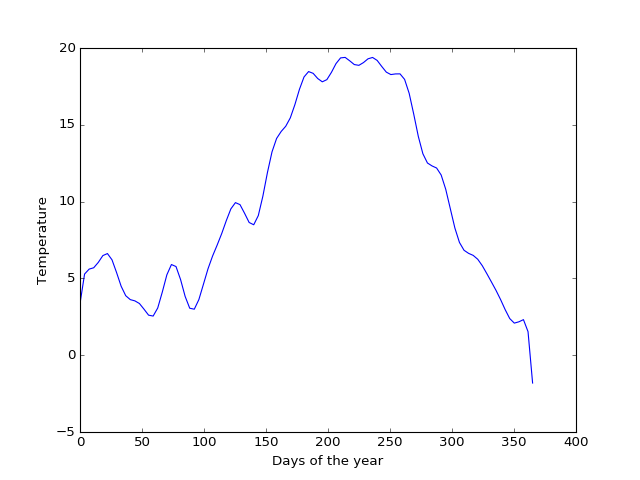

In [409]:
plt.plot(plot_x1,plot_y_pred1,)
plt.xlabel("Days of the year")
plt.ylabel("Temperature")

<IPython.core.display.Javascript object>


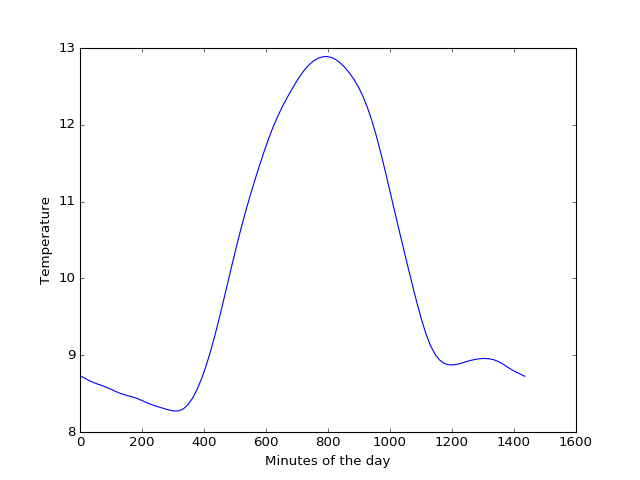

In [410]:
plt.plot(plot_x2,plot_y_pred2)
plt.xlabel("Minutes of the day")
plt.ylabel("Temperature")

<IPython.core.display.Javascript object>


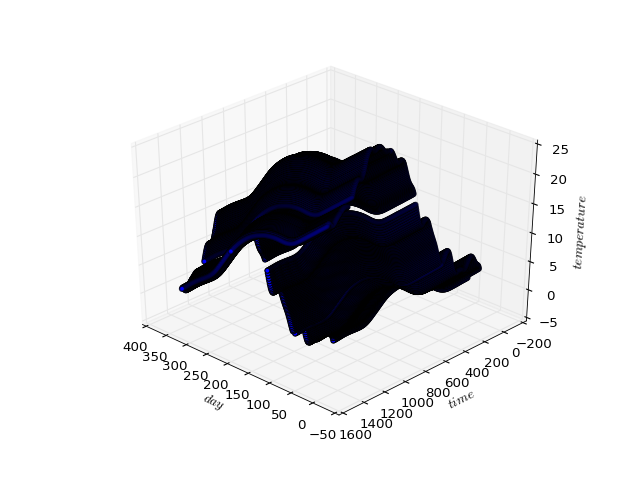

In [413]:
#Plotting the predictions in 3D:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
def plot_data(title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x1_test, x2_test, y_pred) 
    ax.set_xlabel('$day$')
    ax.set_ylabel('$time$')
    ax.set_zlabel('$temperature$')
    if title is not None:
        plt.title(title)

    return ax


_ = plot_data()


In [238]:
#Extracting the data on precipitation: 
usecols_precipitation = [3, 9]
precipitation = [np.loadtxt(f, usecols=usecols_precipitation) for f in files]
precipitation = np.vstack(precipitation)

In [402]:
#Using counter I see that only 365 has 1823 and 366 has 481 
#while others has 1728, 
#which corresponds to 6 times 288 - the total intervals of 5 mins in a day
#Therefore I wrote code to leave out the beginning and the end 
#(calculate them separately)
#, and then loop through the middle
#to sum up the precipitations of all the intervals of a day, 
#and finally I got the representative values of precipitation 
#for every single day. 
from collections import Counter
print Counter(days)
total1=0
total2=0
total3=0
new_prep=[]
new_day=[]
new_day.append(365)
for j in range(0,95):
    total1+=precipitation[i,1]
new_prep.append(total1)
for i in range(95,len(days)-193):
    total2+=precipitation[i,1]
    if (i%288)==1:
        new_prep.append(total2)
        new_day.append(days[i-1])
        total2=0
for k in range(len(days)-193,len(days)):
    total3+=precipitation[i,1]
new_day.append(366)
new_prep.append(total3)
print new_prep


Counter({365: 1823, 1: 1728, 2: 1728, 3: 1728, 4: 1728, 5: 1728, 6: 1728, 7: 1728, 8: 1728, 9: 1728, 10: 1728, 11: 1728, 12: 1728, 13: 1728, 14: 1728, 15: 1728, 16: 1728, 17: 1728, 18: 1728, 19: 1728, 20: 1728, 21: 1728, 22: 1728, 23: 1728, 24: 1728, 25: 1728, 26: 1728, 27: 1728, 28: 1728, 29: 1728, 30: 1728, 31: 1728, 32: 1728, 33: 1728, 34: 1728, 35: 1728, 36: 1728, 37: 1728, 38: 1728, 39: 1728, 40: 1728, 41: 1728, 42: 1728, 43: 1728, 44: 1728, 45: 1728, 46: 1728, 47: 1728, 48: 1728, 49: 1728, 50: 1728, 51: 1728, 52: 1728, 53: 1728, 54: 1728, 55: 1728, 56: 1728, 57: 1728, 58: 1728, 59: 1728, 60: 1728, 61: 1728, 62: 1728, 63: 1728, 64: 1728, 65: 1728, 66: 1728, 67: 1728, 68: 1728, 69: 1728, 70: 1728, 71: 1728, 72: 1728, 73: 1728, 74: 1728, 75: 1728, 76: 1728, 77: 1728, 78: 1728, 79: 1728, 80: 1728, 81: 1728, 82: 1728, 83: 1728, 84: 1728, 85: 1728, 86: 1728, 87: 1728, 88: 1728, 89: 1728, 90: 1728, 91: 1728, 92: 1728, 93: 1728, 94: 1728, 95: 1728, 96: 1728, 97: 1728, 98: 1728, 99: 1728,

In [333]:
new_day=np.asarray(new_day)
new_day=new_day.reshape(2193,1)
new_prep=np.asarray(new_prep)
new_prep=new_prep.reshape(2193,1)
new_data=np.concatenate((new_day,new_prep),axis=1)
valid_prep = new_data[:, 1] >= 0
x_valid=new_data[valid_prep,0]
print x_valid.shape
y_valid=new_data[valid_prep,1]
print y_valid.shape
new_data=new_data[valid_prep]
print new_data.shape

(2174,)
(2174,)
(2174, 2)


In [334]:
#Assign the class for the day, if precipitation is 0, there is no rain, 
#if precipitation is 1, there is rain 
rain_or_not=[]
for prep_score in new_data[:,1]:
    if prep_score > 0:
        rain_or_not.append(1)
    else:
        rain_or_not.append(0)
rain_or_not=np.asarray(rain_or_not)
rain_or_not=rain_or_not.reshape(2174,1)
#print prep_or_not.shape
classification=np.concatenate((new_data,rain_or_not),axis=1)
print classification

[[ 365.     0.     0. ]
 [   1.    13.1    1. ]
 [   8.     0.     0. ]
 ..., 
 [ 364.     0.     0. ]
 [ 365.     0.     0. ]
 [ 366.     0.     0. ]]


In [335]:
#Creating train set and test set
x_valid_train=x_valid[0:-364]
x_valid_test=x_valid[-364:]
y_valid_train=classification[0:-364,2]
y_valid_test=classification[-364:,2]
#print x_valid_test
#print x_valid_train
#print y_valid_test
#print y_valid_train

In [337]:
#Run logistic regression: 
model = LogisticRegression()
model.fit(x_valid_train.reshape(-1,1), y_valid_train)
predicted=model.predict(x_valid_test)
print predicted

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [338]:
probs = model.predict_proba(x_valid_test)
print probs

[[ 0.78139285  0.21860715]
 [ 0.78158022  0.21841978]
 [ 0.78176747  0.21823253]
 [ 0.7819546   0.2180454 ]
 [ 0.78214162  0.21785838]
 [ 0.78232853  0.21767147]
 [ 0.78251531  0.21748469]
 [ 0.78270198  0.21729802]
 [ 0.78288854  0.21711146]
 [ 0.78307498  0.21692502]
 [ 0.78326131  0.21673869]
 [ 0.78344752  0.21655248]
 [ 0.78363361  0.21636639]
 [ 0.78381959  0.21618041]
 [ 0.78400545  0.21599455]
 [ 0.78419119  0.21580881]
 [ 0.78437682  0.21562318]
 [ 0.78456234  0.21543766]
 [ 0.78474774  0.21525226]
 [ 0.78493302  0.21506698]
 [ 0.78511818  0.21488182]
 [ 0.78530324  0.21469676]
 [ 0.78548817  0.21451183]
 [ 0.78567299  0.21432701]
 [ 0.78585769  0.21414231]
 [ 0.78604228  0.21395772]
 [ 0.78622675  0.21377325]
 [ 0.78641111  0.21358889]
 [ 0.78659535  0.21340465]
 [ 0.78677947  0.21322053]
 [ 0.78696348  0.21303652]
 [ 0.78714737  0.21285263]
 [ 0.78733115  0.21266885]
 [ 0.78751481  0.21248519]
 [ 0.78769836  0.21230164]
 [ 0.78788179  0.21211821]
 [ 0.7880651   0.2119349 ]
 

In [331]:
print accuracy_score(y_valid_test,predicted)
print roc_auc_score(y_valid_test,probs[:,1])
print confusion_matrix(y_valid_test, predicted)
print classification_report(y_valid_test, predicted)

0.755494505495
0.587007150153
[[275   0]
 [ 89   0]]
             precision    recall  f1-score   support

        0.0       0.76      1.00      0.86       275
        1.0       0.00      0.00      0.00        89

avg / total       0.57      0.76      0.65       364



/Users/VyUng/anaconda2/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1905: UserWarning: The sum of true positives and false positives are equal to zero for some labels. Precision is ill defined for those labels [ 1.]. The precision and recall are equal to zero for some labels. fbeta_score is ill defined for those labels [ 1.]. 
  average=None)


In [ ]:
#From the prediction, I observe that even if the model predicts 0 all the time, 
#the accuracy is still high - 75%. 
#This is because our data is skewed towards "no rain".
#Therefore, it is better to use other metric 
#to actually evaluate the usefulness of the model. 